In [144]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
#configurando para rodar em CPU
tf.config.set_visible_devices([],'GPU')

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

# Classificação

#### 1. Aquisição dos dados

In [145]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [146]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [147]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

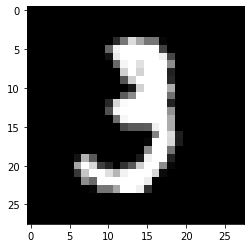

In [148]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

#### Normalização

In [149]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [150]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [151]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [152]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Particionamento de base de dados

In [153]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [154]:
from keras.layers import Dense, Activation, Dropout, Flatten,  Conv2D,MaxPool2D, Conv1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [13]:
rede_simples = Sequential()
rede_simples.add(Conv2D(filters=1,kernel_size=3,activation='relu',input_shape=[28,28,1]))
# rede_simples.add(MaxPool2D(pool_size=(2,2)))
rede_simples.add(Flatten())
rede_simples.add(Dense(25,activation='relu'))
rede_simples.add(Dense(10,activation='softmax'))

### 5. Definir otimizadores

In [14]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [155]:
x_treino = np.expand_dims(x_treino,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)

In [16]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 100, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4604 - accuracy: 0.8630 - val_loss: 0.2779 - val_accuracy: 0.9201
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2380 - accuracy: 0.9302 - val_loss: 0.2146 - val_accuracy: 0.9374
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1958 - accuracy: 0.9420 - val_loss: 0.1968 - val_accuracy: 0.9425
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1694 - accuracy: 0.9492 - val_loss: 0.1842 - val_accuracy: 0.9467
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1518 - accuracy: 0.9543 - val_loss: 0.1754 - val_accuracy: 0.9469
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1385 - accuracy: 0.9592 - val_loss: 0.1769 - val_accuracy: 0.9453
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1257 - accuracy: 0.9619 - val_loss: 0.1639 - val_ac

##### 7. Avaliação do modelo

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x_test = np.expand_dims(x_test,axis=-1)
pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

0.9549

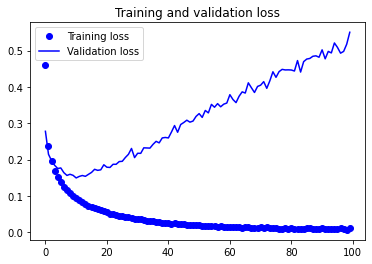

In [19]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [20]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.5146 - val_accuracy: 0.9518
Epoch 2/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.5128 - val_accuracy: 0.9534
Epoch 3/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.5183 - val_accuracy: 0.9513
Epoch 4/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.5249 - val_accuracy: 0.9536
Epoch 5/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.5239 - val_accuracy: 0.9528
Epoch 6/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.5344 - val_accuracy: 0.9528
Epoch 7/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0070 - accuracy: 0.9974 - val_loss: 0.5289 - val_ac

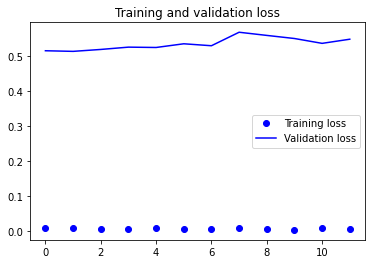

In [21]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

0.9572

In [23]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[ 957,    0,    5,    1,    0,    2,    5,    3,    6,    1],
       [   0, 1115,    4,    4,    1,    2,    1,    4,    4,    0],
       [   7,    2,  990,    9,    7,    1,    3,    5,    8,    0],
       [   0,    0,   11,  968,    1,    6,    0,   10,   12,    2],
       [   3,    0,    8,    1,  940,    2,    8,    1,    1,   18],
       [   6,    1,    2,   25,    3,  806,   19,    3,   18,    9],
       [   8,    1,    2,    1,    9,    8,  921,    1,    7,    0],
       [   1,    4,   16,    7,    5,    1,    0,  978,    5,   11],
       [   2,    2,    3,    4,    3,    4,    9,    3,  938,    6],
       [   4,    2,    1,    5,   13,    5,    0,   13,    7,  959]],
      dtype=int64)

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [156]:
rede_dropout = Sequential()
rede_dropout.add(Conv2D(filters=1,kernel_size=3,activation='relu',input_shape=[28,28,1]))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(MaxPool2D(pool_size=(2,2)))
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,activation='relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(10,activation='softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [157]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7616 - accuracy: 0.7541 - val_loss: 0.3854 - val_accuracy: 0.8992
Epoch 2/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4783 - accuracy: 0.8518 - val_loss: 0.3089 - val_accuracy: 0.9183
Epoch 3/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4379 - accuracy: 0.8614 - val_loss: 0.2906 - val_accuracy: 0.9245
Epoch 4/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4133 - accuracy: 0.8681 - val_loss: 0.2701 - val_accuracy: 0.9302
Epoch 5/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3945 - accuracy: 0.8740 - val_loss: 0.2450 - val_accuracy: 0.9337
Epoch 6/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3866 - accuracy: 0.8774 - val_loss: 0.2426 - val_accuracy: 0.9333
Epoch 7/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3795 - accuracy: 0.8782 - val_loss: 0.2445 - val_ac

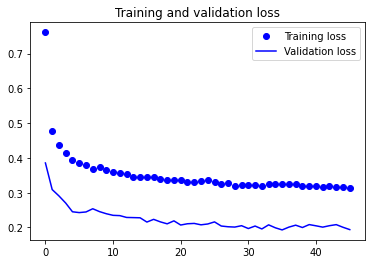

In [158]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

0.9573

In [28]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[ 965,    0,    2,    0,    1,    1,    5,    4,    2,    0],
       [   0, 1116,    4,    0,    1,    2,    7,    0,    5,    0],
       [   8,    1,  978,   14,    4,    1,    5,   10,   10,    1],
       [   0,    1,    6,  957,    0,   21,    1,   10,   11,    3],
       [   0,    1,    5,    0,  947,    0,    6,    1,    2,   20],
       [   6,    0,    0,   15,    2,  831,    8,    4,   18,    8],
       [  11,    3,    1,    0,    4,    4,  932,    0,    3,    0],
       [   3,    8,   16,   15,    2,    0,    0,  963,    3,   18],
       [   7,    2,    8,    5,    7,    1,    3,    3,  932,    6],
       [   4,    5,    0,   12,   17,    7,    0,    8,    4,  952]],
      dtype=int64)

# Regressão

In [67]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [68]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [51]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [134]:
model = Sequential()
model.add(Conv1D(3,1, activation='relu', input_shape=(len(x_train[1]),1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [135]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 13, 3)             6         
_________________________________________________________________
dense_32 (Dense)             (None, 13, 64)            256       
_________________________________________________________________
dense_33 (Dense)             (None, 13, 1)             65        
Total params: 327
Trainable params: 327
Non-trainable params: 0
_________________________________________________________________


In [127]:
x_treino = np.expand_dims(x_treino,axis=1)

In [69]:
x_train = np.expand_dims(x_train,axis=-1)

In [ ]:
valid = (x_val,y_val)

In [136]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
callbacks = [es]
historico = model.fit(x_train, 
                             y_train, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_split = 0.2 ,
                             shuffle=True,
                             callbacks = callbacks)

Epoch 1/150
6/6 [==============================] - 1s 23ms/step - loss: 567.6996 - mae: 21.9914 - val_loss: 635.4394 - val_mae: 23.4742
Epoch 2/150
6/6 [==============================] - 0s 4ms/step - loss: 562.4835 - mae: 21.8726 - val_loss: 630.8491 - val_mae: 23.3767
Epoch 3/150
6/6 [==============================] - 0s 5ms/step - loss: 558.2338 - mae: 21.7768 - val_loss: 626.2439 - val_mae: 23.2784
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 553.9417 - mae: 21.6766 - val_loss: 621.9752 - val_mae: 23.1869
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 549.8588 - mae: 21.5828 - val_loss: 617.4418 - val_mae: 23.0892
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 545.5451 - mae: 21.4812 - val_loss: 612.4454 - val_mae: 22.9811
Epoch 7/150
6/6 [==============================] - 0s 5ms/step - loss: 540.8054 - mae: 21.3722 - val_loss: 607.0807 - val_mae: 22.8643
Epoch 8/150
6/6 [==============================] - 0s 

In [76]:
x_test = np.expand_dims(x_test, axis=-1)

In [86]:
x_test.shape

(102, 13, 1)

In [137]:
pred_simples = model.predict(x_test)

In [139]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, np.mean(pred_simples,axis=1))

6.251049916884478

In [140]:
import pandas as pd

resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = np.mean(pred_simples,axis=1)

resultado

,y_test,y_pred
0,7.2,21.015167
1,18.8,21.172346
2,19.0,21.469160
3,27.0,21.902241
4,22.2,21.707869
...,...,...
97,21.9,21.073530
98,24.1,22.059984
99,50.0,21.910994
100,26.7,21.599499
